# Опционный калькулятор 3.

## Описание:

 - Выведем графики прибыли / убытка по опциону на дату погашения.
 - Применим формулу Блека - Шоулза для определения стоимости опциона.
 - Построим графики изменения значений премии и "греков" опциона в зависимости от разных факторов.

## Импорт библиотек:

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
import sys

In [4]:
sys.path.append('../')

In [5]:
sys.path.append('../includes/')

In [6]:
from includes import black_sholes_model as bs

In [7]:
from includes.classes import Option, Future

## Выведем графики изменения премии и "греков" опциона в зависимости от изменения различных факторов

### Графики зависимости свойств опциона от изменения цены спот

#### зададим диапазон цен спот

In [8]:
spot_range = np.arange(85000, 115000, 100)

#### страйк опциона

In [9]:
strike = 100000

#### подразумеваемая волатильность

In [10]:
iv = 30

#### число дней до экспирации (в календарных днях, число больше нуля)

In [11]:
t = 20

#### Размер позиции по опционам

In [12]:
size = 1

#### График изменения премии опциона

In [13]:
result_call = Option(spot_range, strike, iv, t, 'Call').prem * size
result_put = Option(spot_range, strike, iv, t, 'Put').prem * size

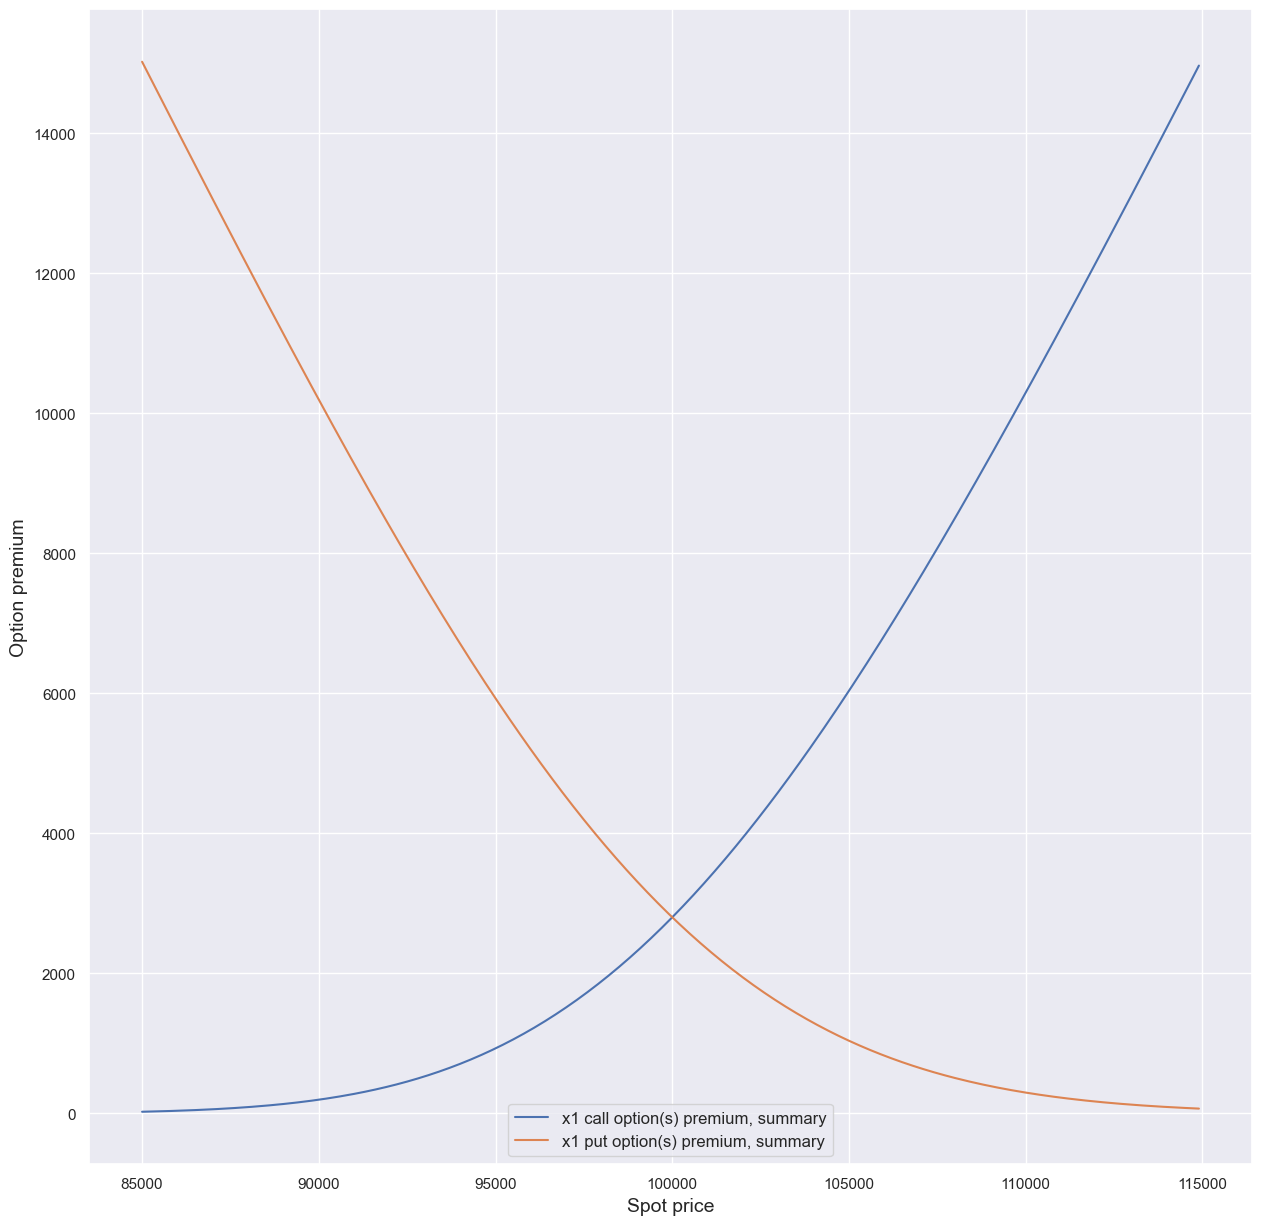

In [14]:
plt.figure(figsize=(15, 15))
plt.plot(spot_range, result_call, label = 'x{} call option(s) premium, summary'.format(size))
plt.plot(spot_range, result_put, label = 'x{} put option(s) premium, summary'.format(size))
plt.xlabel('Spot price', fontsize=14)
plt.ylabel('Option premium', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

#### График изменения дельты опциона

In [15]:
result_call = Option(spot_range, strike, iv, t, 'Call').delta * size
result_put = Option(spot_range, strike, iv, t, 'Put').delta * size

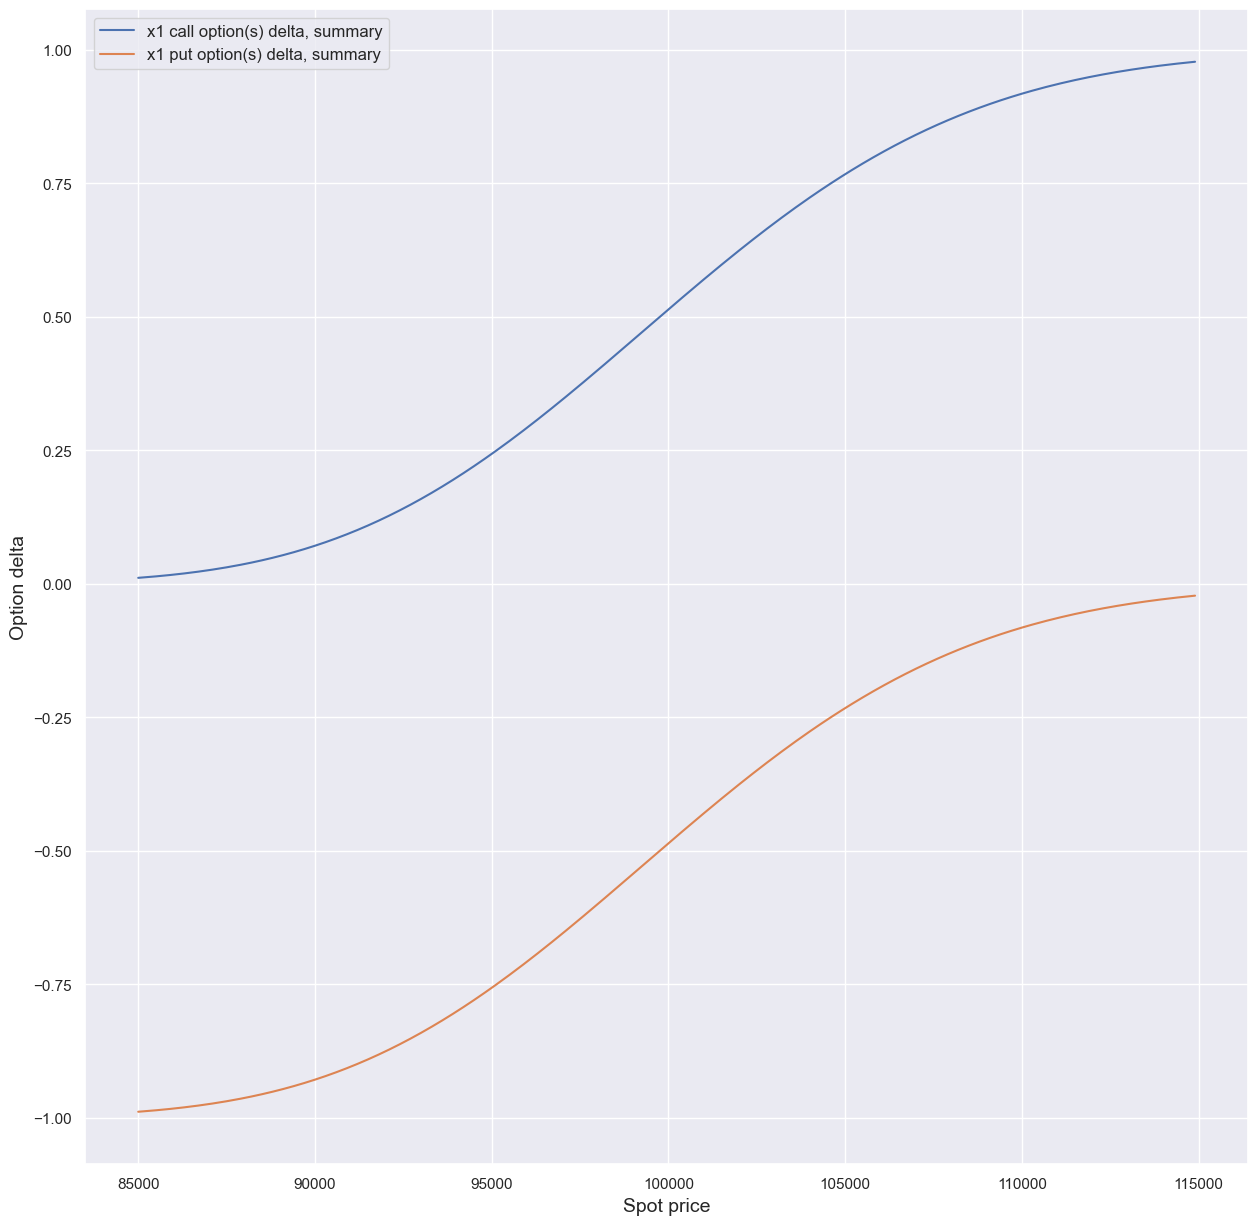

In [16]:
plt.figure(figsize=(15, 15))
plt.plot(spot_range, result_call, label = 'x{} call option(s) delta, summary'.format(size))
plt.plot(spot_range, result_put, label = 'x{} put option(s) delta, summary'.format(size))
plt.xlabel('Spot price', fontsize=14)
plt.ylabel('Option delta', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

#### График изменения гаммы опциона

In [17]:
result = Option(spot_range, strike, iv, t, '').gamma * size

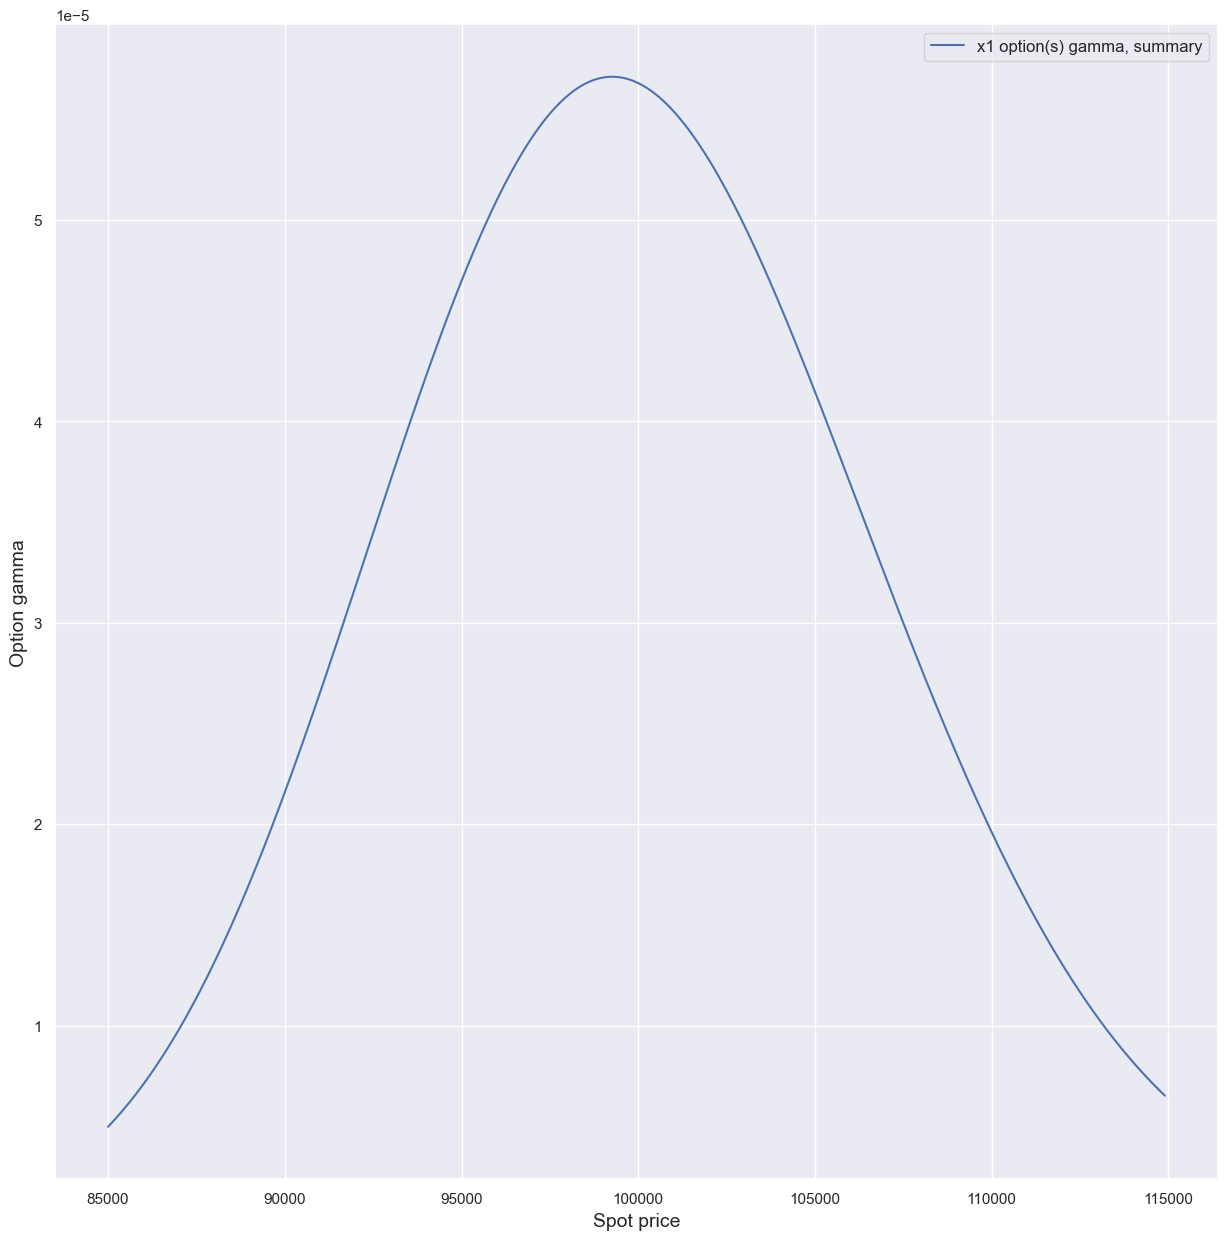

In [18]:
plt.figure(figsize=(15, 15))
plt.plot(spot_range, result, label = 'x{} option(s) gamma, summary'.format(size))
plt.xlabel('Spot price', fontsize=14)
plt.ylabel('Option gamma', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

#### График изменения теты опциона

In [19]:
result = Option(spot_range, strike, iv, t, '').theta * size

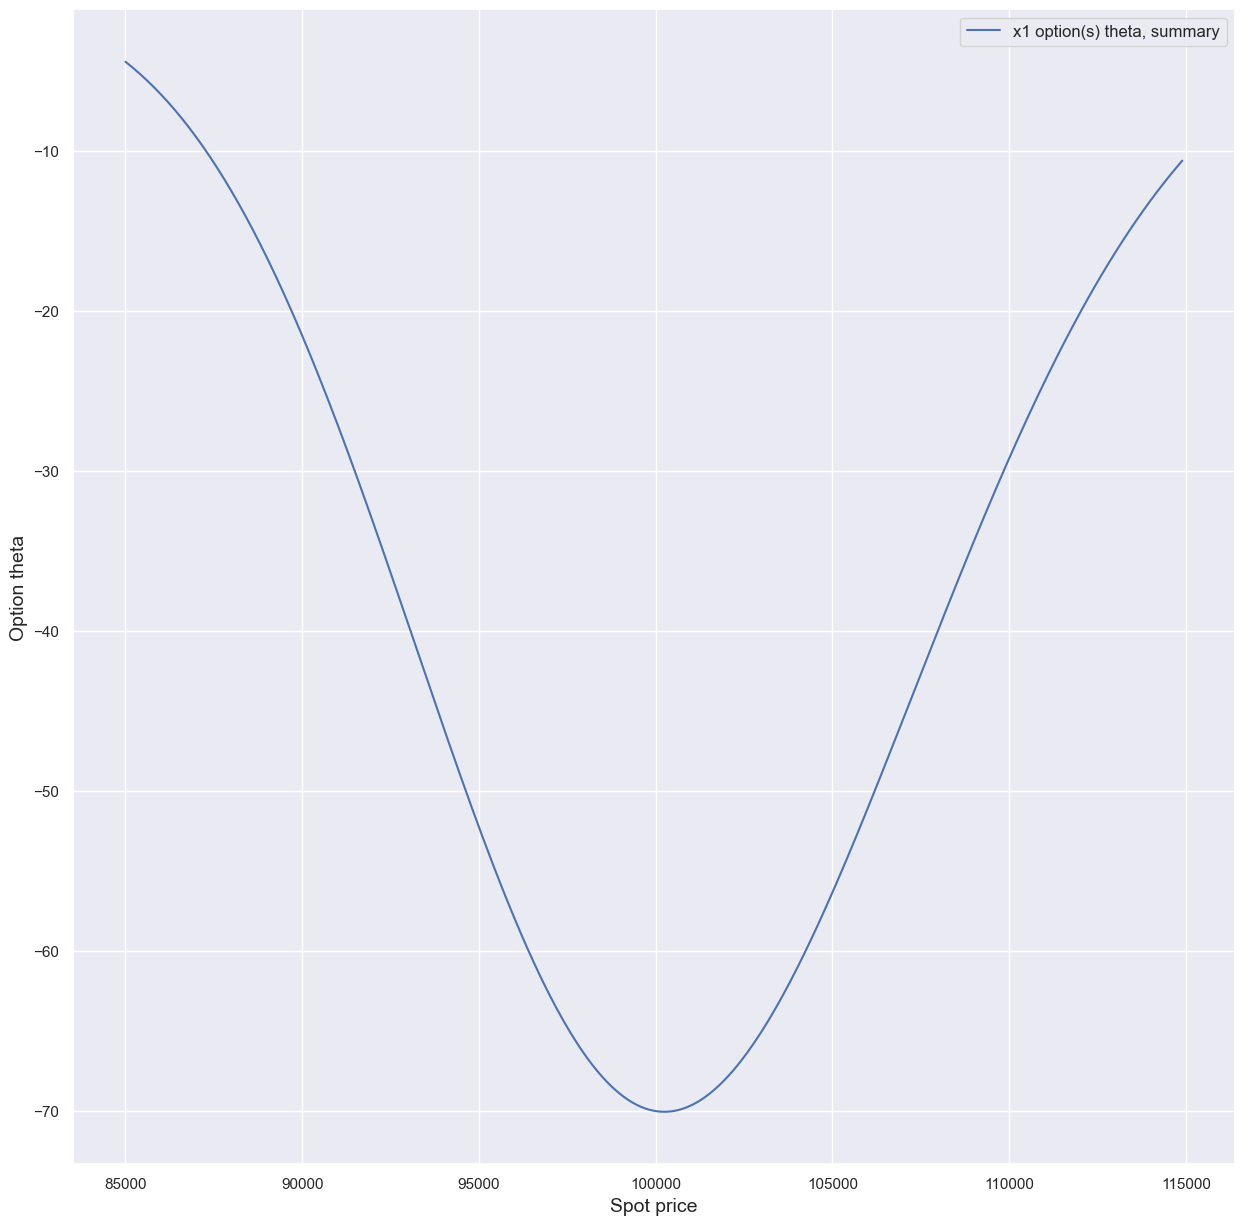

In [20]:
plt.figure(figsize=(15, 15))
plt.plot(spot_range, result, label = 'x{} option(s) theta, summary'.format(size))
plt.xlabel('Spot price', fontsize=14)
plt.ylabel('Option theta', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

#### График изменения веги опциона

In [21]:
result = Option(spot_range, strike, iv, t, '').vega * size

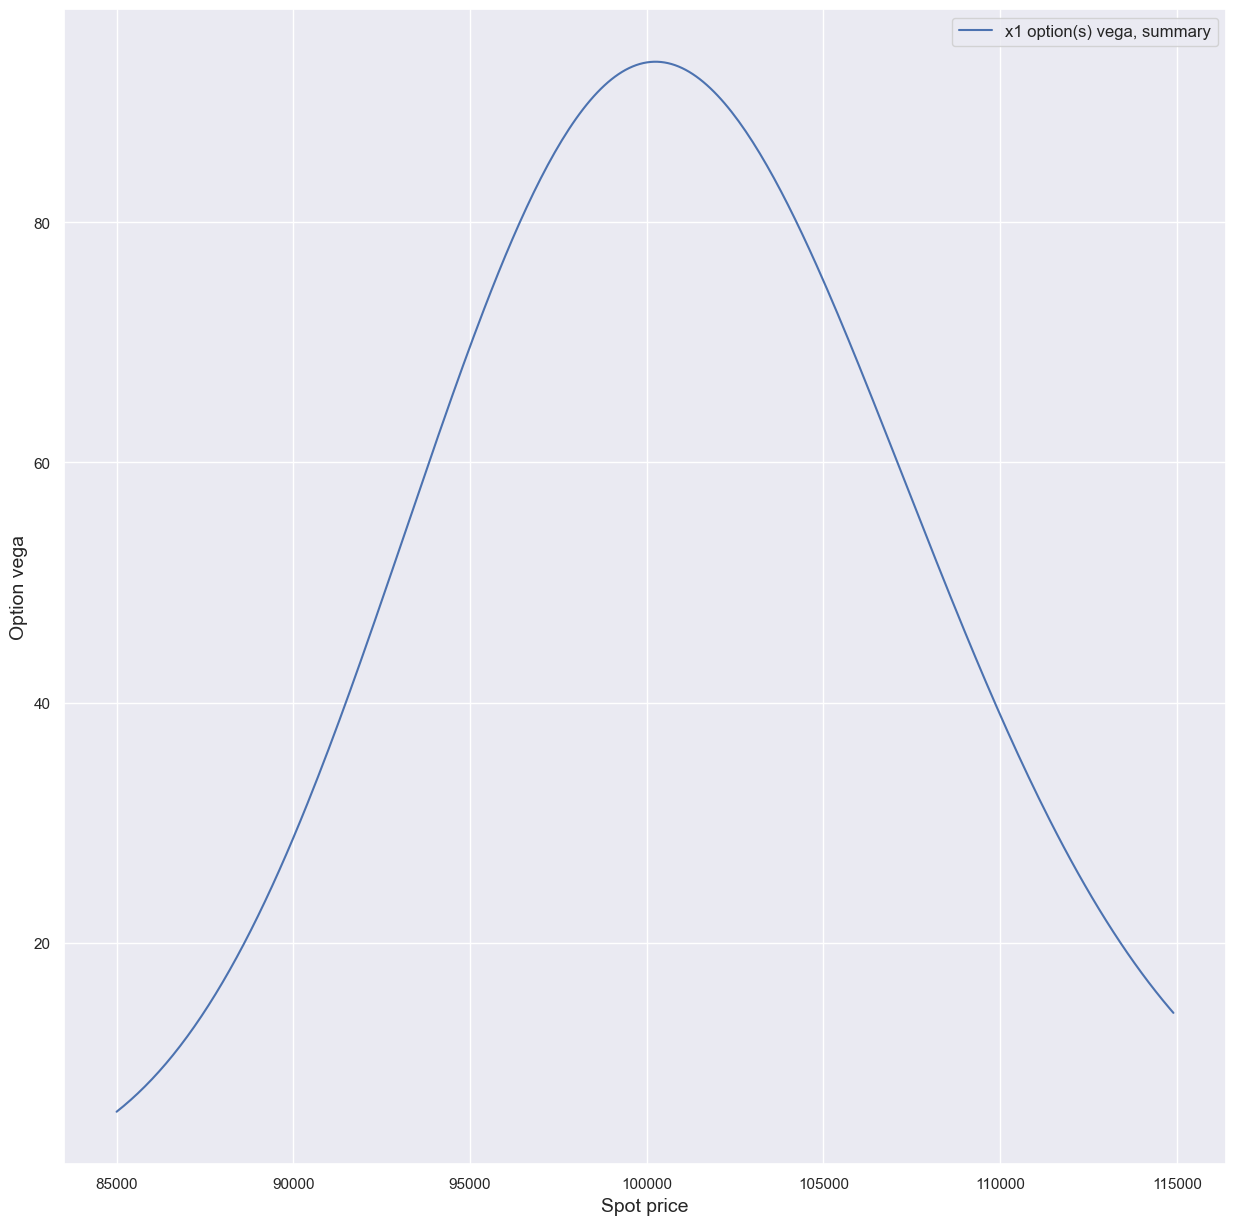

In [22]:
plt.figure(figsize=(15, 15))
plt.plot(spot_range, result, label = 'x{} option(s) vega, summary'.format(size))
plt.xlabel('Spot price', fontsize=14)
plt.ylabel('Option vega', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

### Графики зависимости свойств опциона от изменения времени, оставшегося до экспирации опциона

#### зададим цену спот

In [23]:
spot = 100000

#### страйк опциона

In [24]:
strike = 100000

#### подразумеваемая волатильность

In [25]:
iv = 30

#### число дней до экспирации (в календарных днях, число больше нуля)

In [26]:
t = np.arange(1, 91, 1)

#### Размер позиции по опционам

In [27]:
size = 1

#### График изменения премии опциона

In [28]:
result_call = Option(spot, strike, iv, t, 'Call').prem * size
result_put = Option(spot, strike, iv, t, 'Put').prem * size

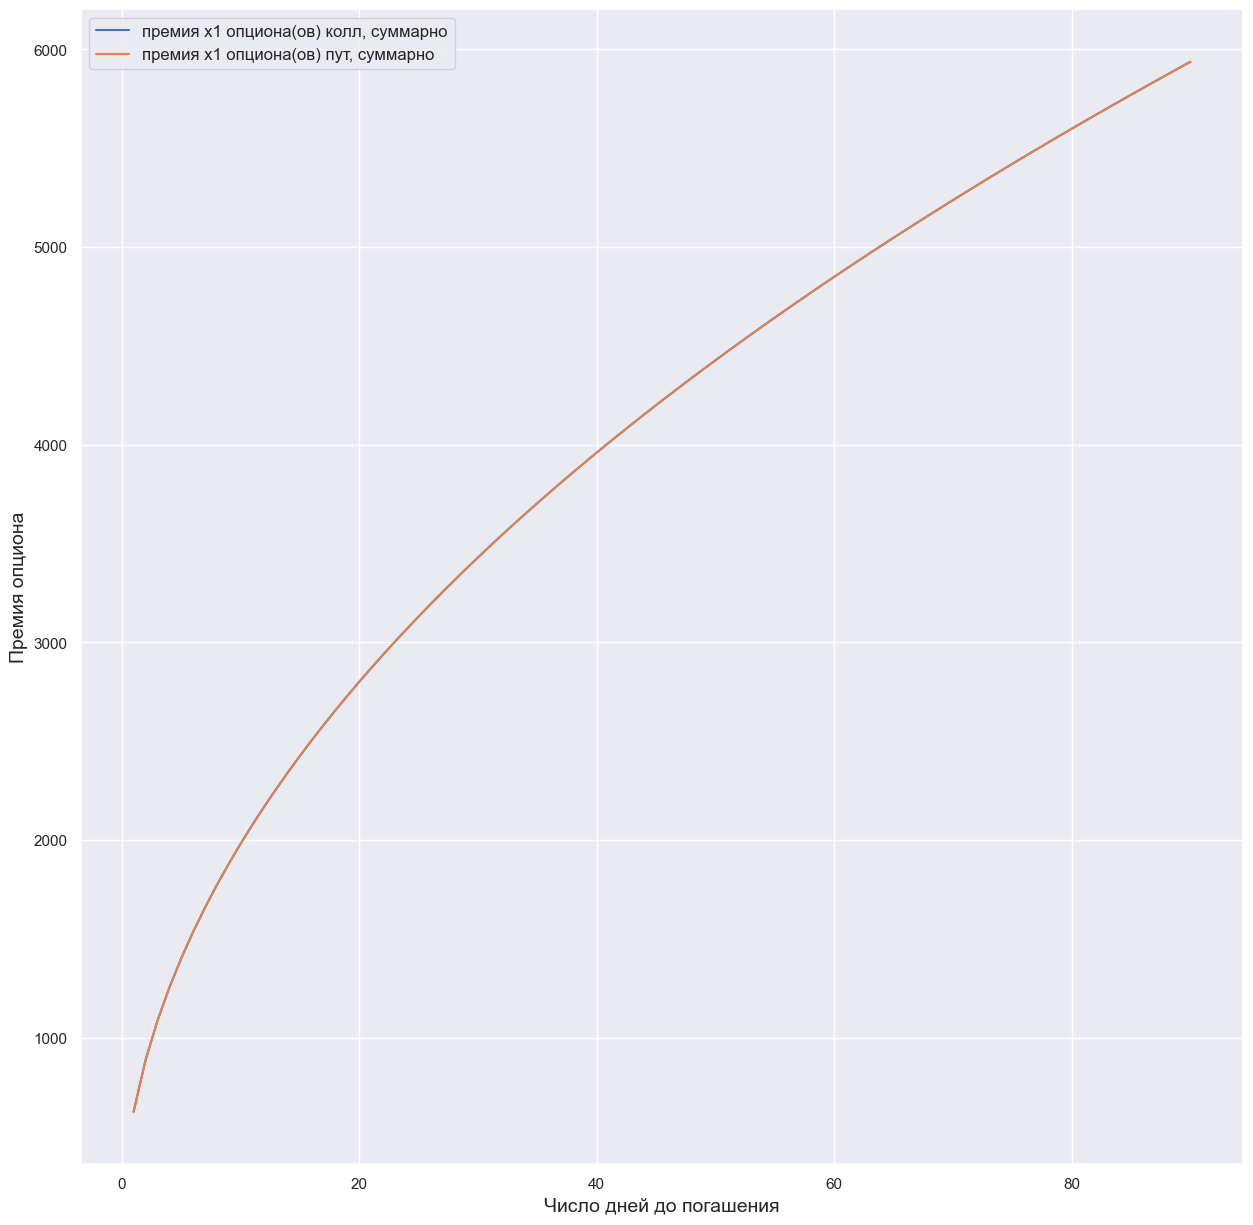

In [29]:
plt.figure(figsize=(15, 15))
plt.plot(t, result_call, label = 'премия x{} опциона(ов) колл, суммарно'.format(size))
plt.plot(t, result_put, label = 'премия x{} опциона(ов) пут, суммарно'.format(size))
plt.xlabel('Число дней до погашения', fontsize=14)
plt.ylabel('Премия опциона', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

#### График изменения теты опциона

In [30]:
result = Option(spot, strike, iv, t, '').theta * size

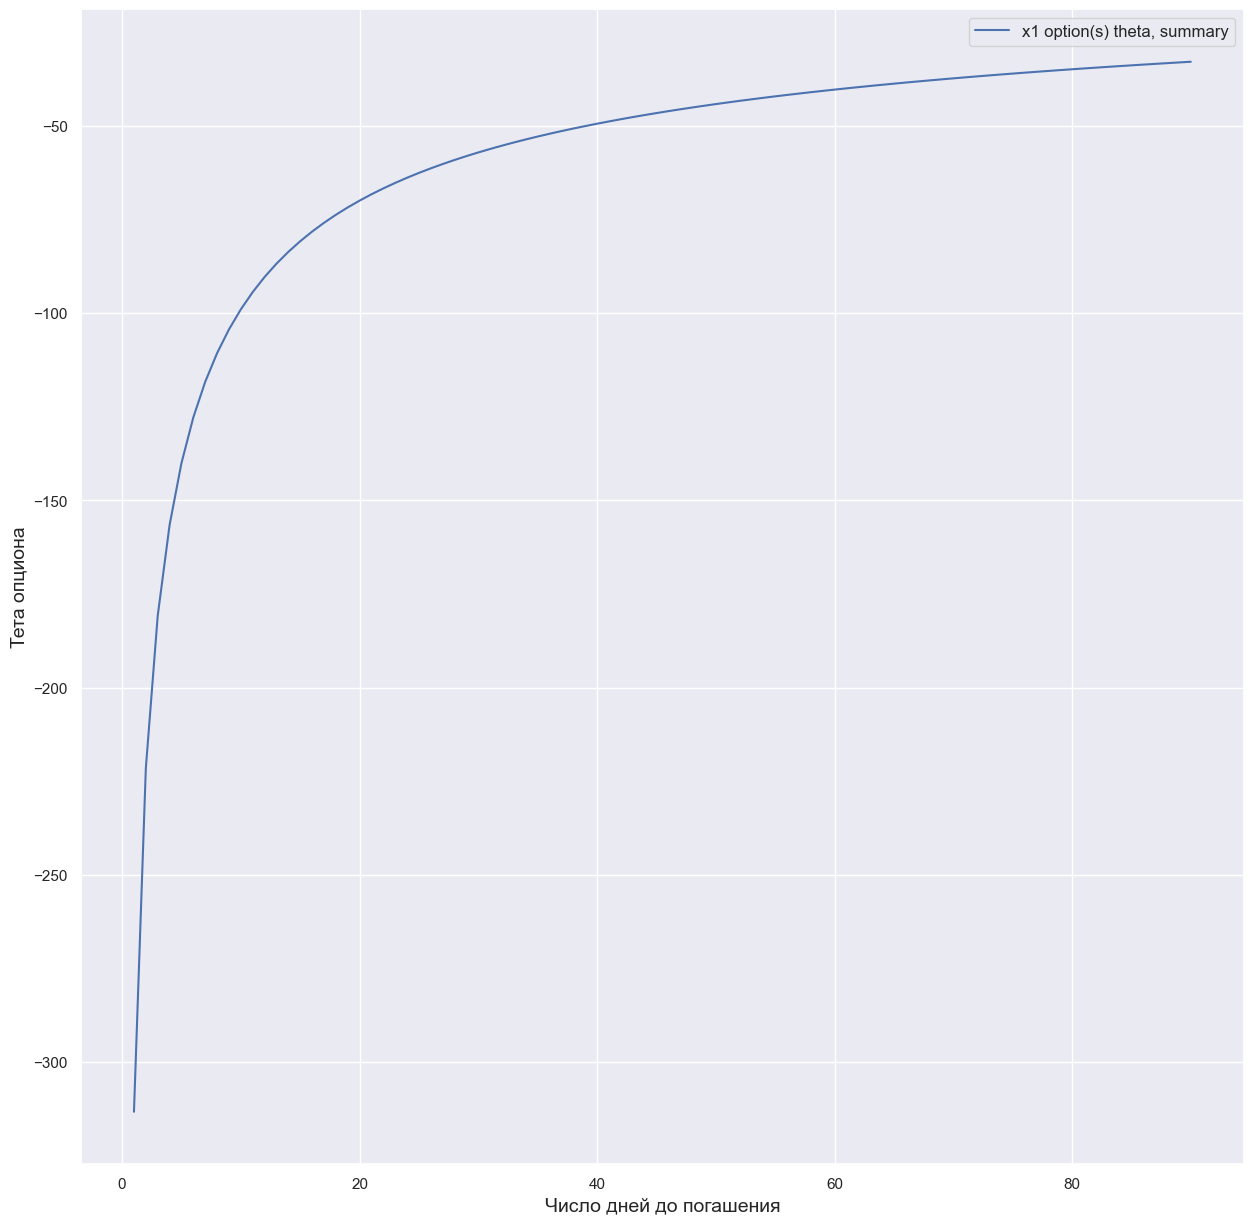

In [31]:
plt.figure(figsize=(15, 15))
plt.plot(t, result, label = 'x{} option(s) theta, summary'.format(size))
plt.xlabel('Число дней до погашения', fontsize=14)
plt.ylabel('Тета опциона', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

#### График изменения веги опциона

In [32]:
result = Option(spot, strike, iv, t, '').vega * size

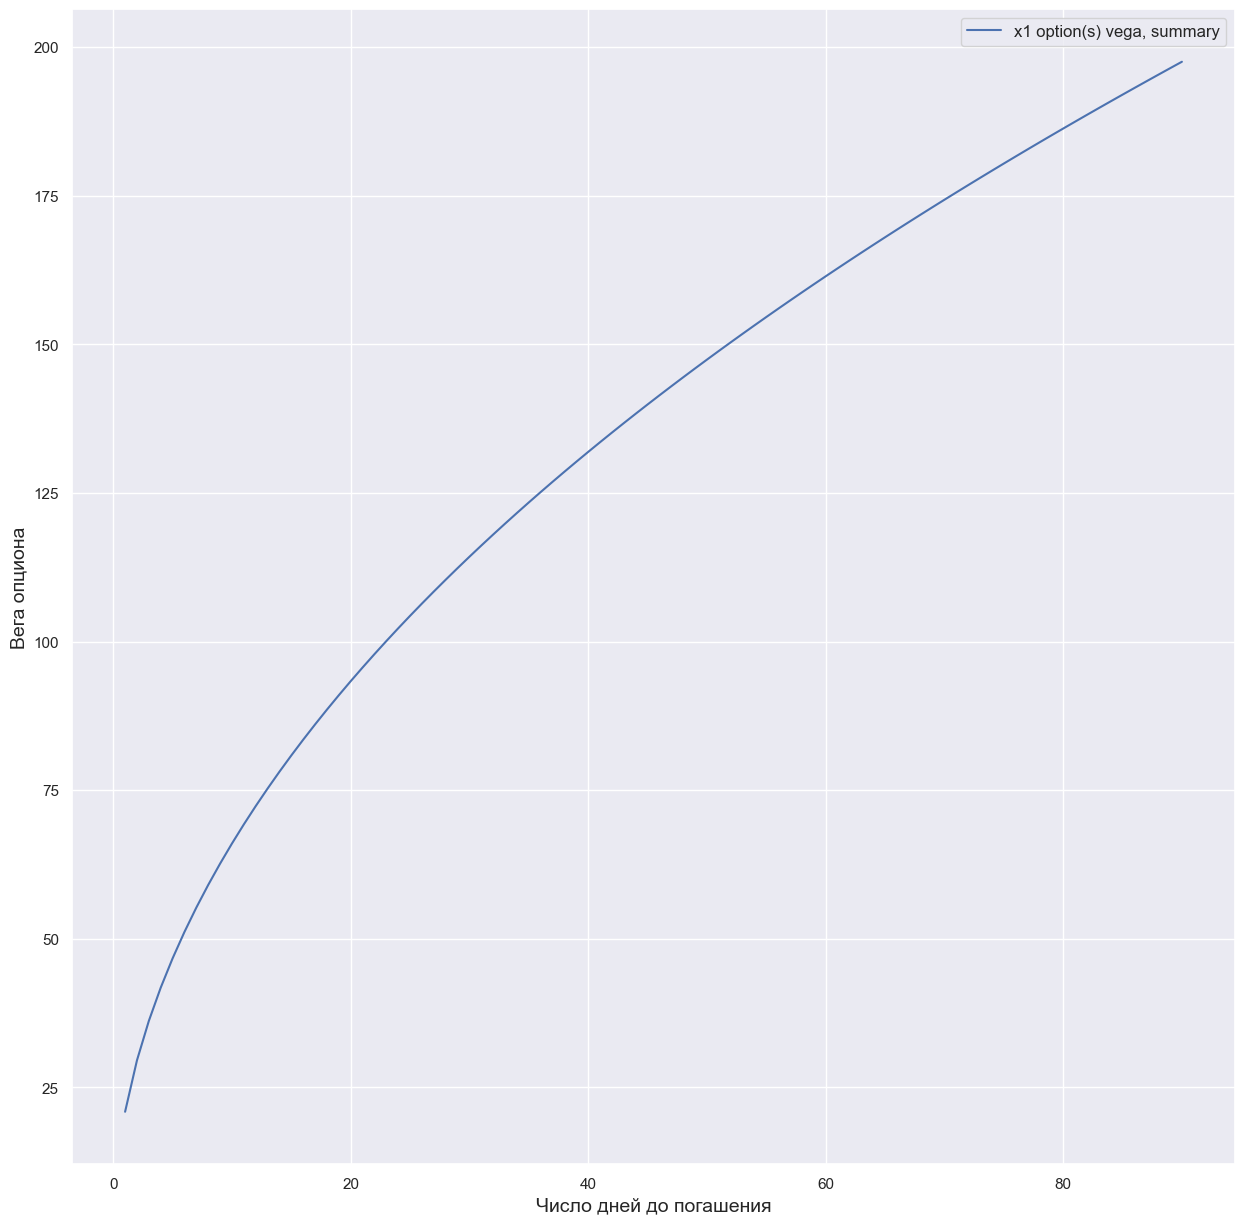

In [33]:
plt.figure(figsize=(15, 15))
plt.plot(t, result, label = 'x{} option(s) vega, summary'.format(size))
plt.xlabel('Число дней до погашения', fontsize=14)
plt.ylabel('Вега опциона', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

### Графики зависимости свойств опциона от изменения подразумеваемой волатильности

#### зададим цену спот

In [34]:
spot = 100000

#### страйк опциона

In [35]:
strike = 100000

#### подразумеваемая волатильность

In [36]:
iv = np.arange(10, 80, 1)

#### число дней до экспирации (в календарных днях, число больше нуля)

In [37]:
t = 30

#### Размер позиции по опционам

In [38]:
size = 1

#### График изменения премии опциона

In [39]:
result_call = Option(spot, strike, iv, t, 'Call').prem * size
result_put = Option(spot, strike, iv, t, 'Put').prem * size

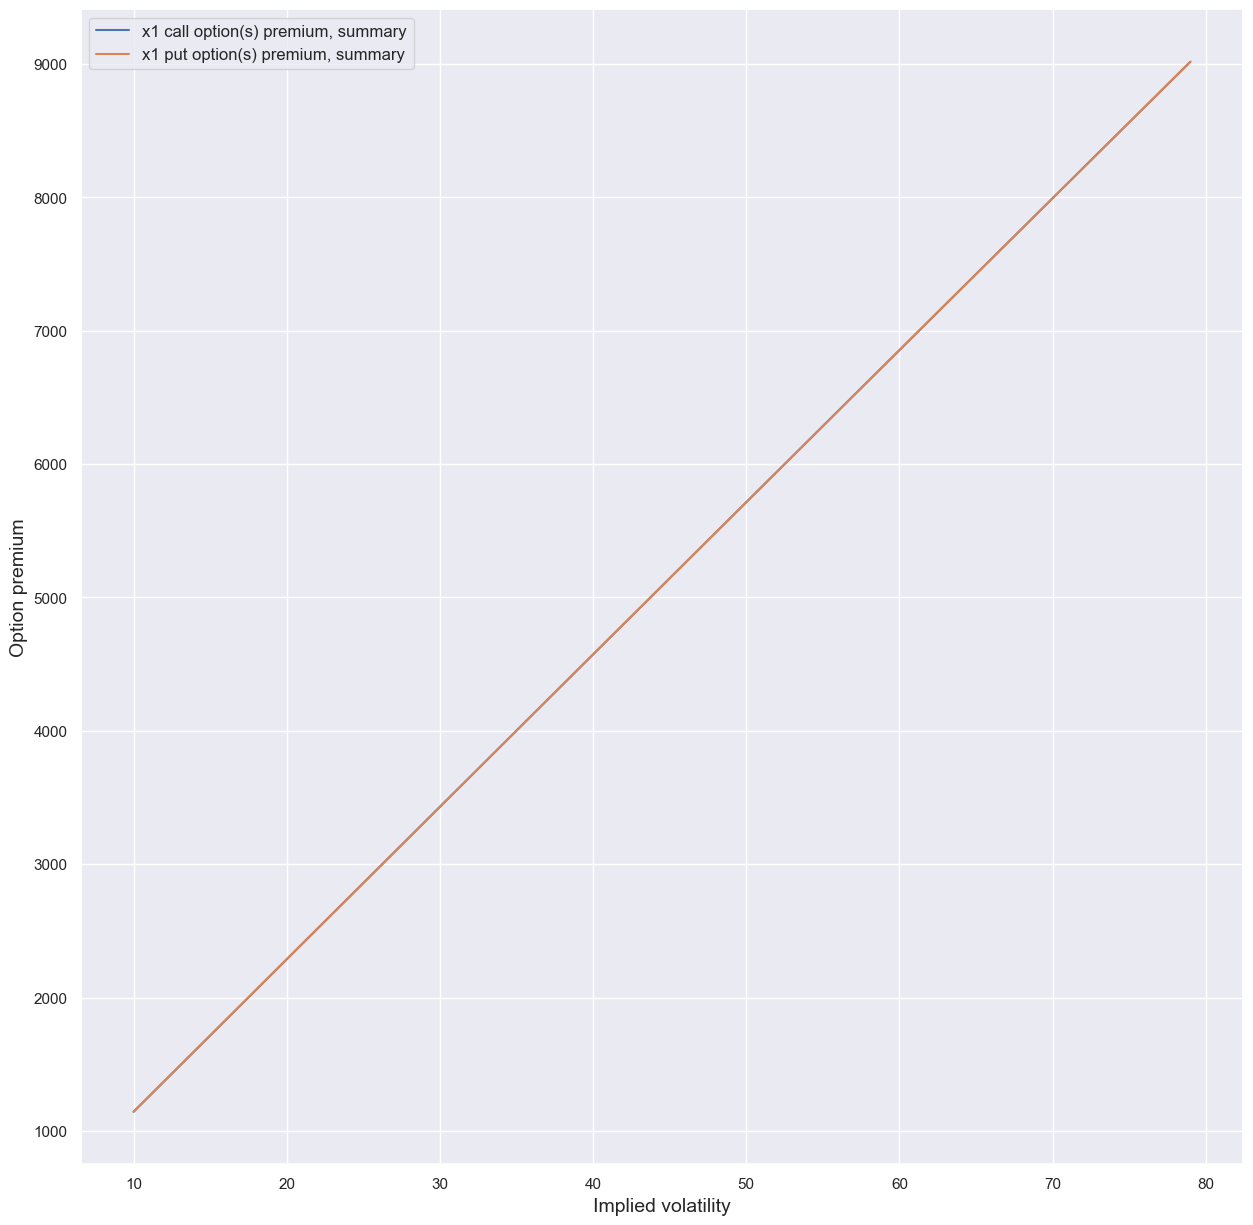

In [40]:
plt.figure(figsize=(15, 15))
plt.plot(iv, result_call, label = 'x{} call option(s) premium, summary'.format(size))
plt.plot(iv, result_put, label = 'x{} put option(s) premium, summary'.format(size))
plt.xlabel('Implied volatility', fontsize=14)
plt.ylabel('Option premium', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

#### График изменения теты опциона

In [41]:
result = Option(spot, strike, iv, t, '').theta * size

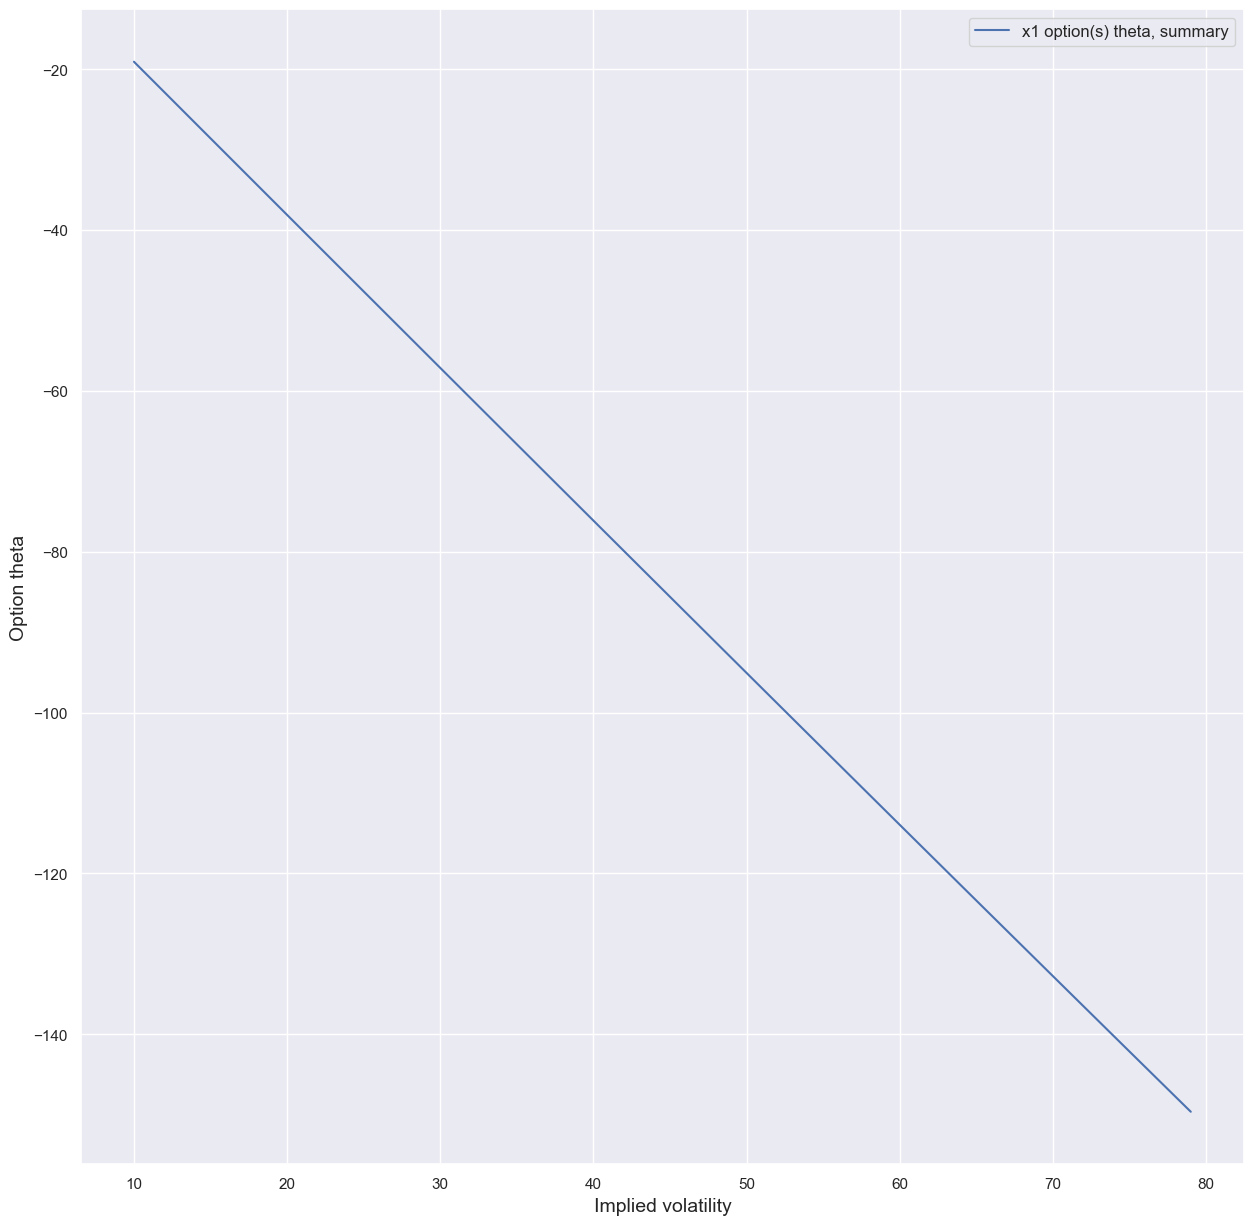

In [42]:
plt.figure(figsize=(15, 15))
plt.plot(iv, result, label = 'x{} option(s) theta, summary'.format(size))
plt.xlabel('Implied volatility', fontsize=14)
plt.ylabel('Option theta', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()